In [1]:
!pip install kaggle

^C


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bicho15h","key":"97e3a4c4c190ec2c4cd7972b5c9a4ffa"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d sansuthi/dry-bean-dataset

  0% 0.00/1.01M [00:00<?, ?B/s]
100% 1.01M/1.01M [00:00<00:00, 91.9MB/s]


In [6]:
!mkdir bean

In [7]:
!unzip dry-bean-dataset.zip -d bean

Archive:  dry-bean-dataset.zip
  inflating: bean/Dry_Bean.csv       


In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

In [9]:
df = pd.read_csv('/content/bean/Dry_Bean.csv')

In [10]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [11]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [12]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [13]:
df["Class"].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [14]:
X = df.drop(columns=["Class"])
Y = df["Class"]

In [15]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [16]:
Y.head()

0    SEKER
1    SEKER
2    SEKER
3    SEKER
4    SEKER
Name: Class, dtype: object

In [17]:
scaler = StandardScaler()
col_names = X.columns

X = scaler.fit_transform(X)

X = pd.DataFrame(data=X, columns=col_names)
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640


In [18]:
X.shape

(13611, 16)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10888, 16), (2723, 16), (10888,), (2723,))

In [50]:
stacked_encoder = tf.keras.models.Sequential([

    layers.Dense(15, activation="relu",input_shape=(X.shape[1],)),
    layers.Dense(14, activation="relu"),

    layers.Dense(13, activation="relu"),
    layers.Dense(12, activation="relu")
])

In [51]:
stacked_encoder.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 15)                255       
                                                                 
 dense_39 (Dense)            (None, 14)                224       
                                                                 
 dense_40 (Dense)            (None, 13)                195       
                                                                 
 dense_41 (Dense)            (None, 12)                168       
                                                                 
Total params: 842 (3.29 KB)
Trainable params: 842 (3.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
stacked_decoder = tf.keras.models.Sequential([

    layers.Dense(13, activation="relu", input_shape=[12]),

    layers.Dense(14, activation="relu"),

    layers.Dense(15, activation="relu"),

    layers.Dense(X.shape[1])

])

In [53]:
stacked_decoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 13)                169       
                                                                 
 dense_43 (Dense)            (None, 14)                196       
                                                                 
 dense_44 (Dense)            (None, 15)                225       
                                                                 
 dense_45 (Dense)            (None, 16)                256       
                                                                 
Total params: 846 (3.30 KB)
Trainable params: 846 (3.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
ae_model = tf.keras.models.Sequential([stacked_encoder, stacked_decoder])

ae_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 12)                842       
                                                                 
 sequential_12 (Sequential)  (None, 16)                846       
                                                                 
Total params: 1688 (6.59 KB)
Trainable params: 1688 (6.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


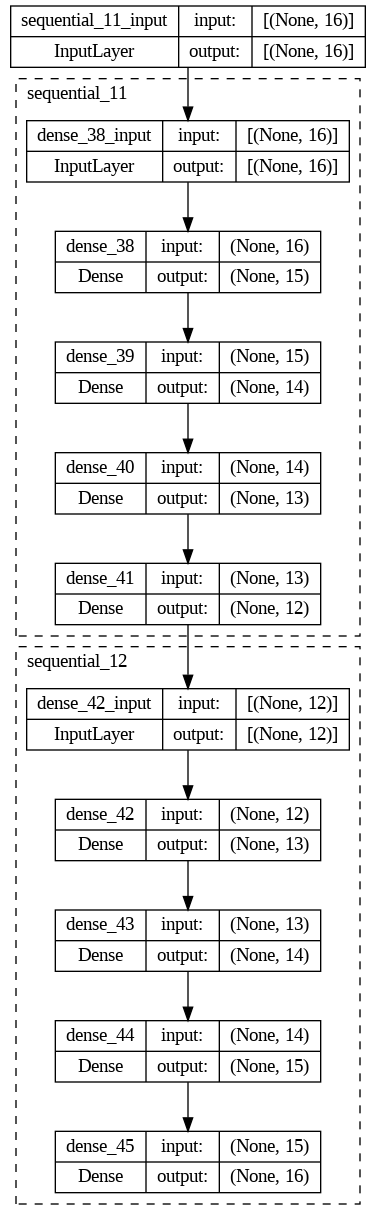

In [55]:
keras.utils.plot_model(ae_model, expand_nested=True, show_shapes=True)

In [56]:
ae_model.compile(loss='mean_squared_error',
                 optimizer ='adam',
                 metrics=['mse'])

In [57]:
training_hist = ae_model.fit(x_train,
                             x_train,
                             epochs=20)

Epoch 1/20
341/341 [==============================] - 3s 3ms/step - loss: 0.3364 - mse: 0.3364
Epoch 2/20
341/341 [==============================] - 1s 2ms/step - loss: 0.1028 - mse: 0.1028
Epoch 3/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0747 - mse: 0.0747
Epoch 4/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0656 - mse: 0.0656
Epoch 5/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0601 - mse: 0.0601
Epoch 6/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0534 - mse: 0.0534
Epoch 7/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0436 - mse: 0.0436
Epoch 8/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0253 - mse: 0.0253
Epoch 9/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0135 - mse: 0.0135
Epoch 10/20
341/341 [==============================] - 1s 2ms/step - loss: 0.0106 - mse: 0.0106
Epoch 11/20
341/341 [============================

In [66]:
x_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
6033,-0.119540,0.081909,0.444805,-0.568042,1.799744,1.293143,-0.123169,-0.032221,0.059608,0.369008,-0.942287,-1.601182,0.591900,-1.071574,-1.536632,0.285595
9313,-0.198591,-0.139706,-0.052646,-0.250571,0.280735,0.491517,-0.200418,-0.132701,-0.381347,0.173211,-0.035288,-0.372207,0.106334,-0.359265,-0.404328,0.531783
8828,-0.276380,-0.305012,-0.326891,-0.119333,-0.403894,-0.132512,-0.281932,-0.234015,1.342348,0.725368,0.535066,0.307972,-0.056507,0.145725,0.272307,-0.053000
584,-0.551385,-0.749380,-0.940111,-0.133338,-1.469951,-1.928706,-0.555831,-0.614591,0.537063,0.804450,1.461795,1.695121,-0.059692,1.620936,1.762545,0.804486
2835,0.652481,1.140627,0.942557,0.640311,0.615468,0.720758,0.669037,0.846507,-0.726425,-1.629527,-2.070656,-0.708048,-0.894865,-0.999888,-0.725290,-0.680353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13452,-0.437379,-0.545471,-0.505126,-0.378939,-0.359099,-0.083423,-0.444088,-0.452222,-0.414152,1.049502,0.903361,0.284227,0.283208,0.301216,0.248085,0.823155
667,-0.534846,-0.724021,-0.846921,-0.221305,-1.199835,-1.317274,-0.540582,-0.590591,0.104222,1.004578,1.421217,1.315321,0.055025,1.252949,1.339801,0.950303
10048,0.112018,0.228123,0.352630,0.070570,0.495124,0.642837,0.107571,0.249291,-1.222095,0.355880,-0.123737,-0.574602,-0.305135,-0.681533,-0.598795,0.323037
3261,1.114473,1.217885,1.202031,1.258663,0.208126,0.436255,1.107946,1.306597,-0.278972,0.216263,-0.146162,-0.309291,-1.443056,-0.980858,-0.343233,0.320100


In [67]:
pd.DataFrame(ae_model.predict(x_test))

86/86 [==============================] - 0s 2ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.162984,0.066694,0.477011,-0.614710,1.730476,1.335715,-0.146687,-0.038304,0.037646,0.457026,-0.953873,-1.599705,0.599390,-0.983726,-1.513252,0.292398
1,-0.260121,-0.146566,-0.032131,-0.246714,0.249707,0.558067,-0.254136,-0.130673,-0.403836,0.249188,-0.041087,-0.374968,0.051958,-0.374975,-0.394412,0.530245
2,-0.310988,-0.335534,-0.344425,-0.120116,-0.398402,-0.100105,-0.319216,-0.231132,1.296649,0.689277,0.716743,0.286258,-0.060329,0.108855,0.246163,0.064969
3,-0.550479,-0.793464,-0.942337,-0.157948,-1.492610,-1.959714,-0.583182,-0.629186,0.531036,0.824762,1.501460,1.700675,-0.025288,1.670910,1.765203,0.830666
4,0.679180,1.040257,1.005919,0.639888,0.743423,0.745177,0.673632,0.878578,-0.714941,-1.822975,-1.608101,-0.797312,-0.905408,-1.054106,-0.790750,-0.425302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,-0.400771,-0.558295,-0.470239,-0.366883,-0.339148,-0.134866,-0.441563,-0.433829,-0.457793,1.068885,0.919045,0.287998,0.309978,0.353317,0.254378,0.806057
2719,-0.508060,-0.750666,-0.814279,-0.233502,-1.164171,-1.405391,-0.545986,-0.581715,0.061710,1.009257,1.472763,1.287764,0.085621,1.300573,1.318063,0.939736
2720,0.058701,0.246292,0.343191,0.072687,0.515047,0.606663,0.043309,0.239633,-1.213469,0.460598,-0.268376,-0.549548,-0.380377,-0.713490,-0.565635,0.297334
2721,1.195318,1.205970,1.161608,1.238140,0.165132,0.419707,1.171981,1.275330,-0.263880,0.298595,-0.227201,-0.285341,-1.363756,-0.929060,-0.322837,0.301726


In [69]:
ae_model.evaluate(x_test,x_test)

86/86 [==============================] - 0s 2ms/step - loss: 0.0062 - mse: 0.0062


[0.0061647226102650166, 0.0061647226102650166]